In [262]:
from google.colab import drive
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount("/content/drive")
df = pd.read_csv('/content/drive/MyDrive/Datasets/young-people-survey-responses.csv')

print("Target variable: 'Loneliness'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Target variable: 'Loneliness'


**Part 1: Data Loading and Initial Exploration**

In [263]:
dims = df.shape
print(f"{dims[0]} rows x {dims[1]} cols")
print(df.info())
df.head(10)

1010 rows x 16 cols
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1010 non-null   int64  
 1   Music            1007 non-null   float64
 2   Techno           1003 non-null   float64
 3   Movies           1004 non-null   float64
 4   History          1008 non-null   float64
 5   Mathematics      1007 non-null   float64
 6   Pets             1006 non-null   float64
 7   Spiders          1005 non-null   float64
 8   Loneliness       1009 non-null   float64
 9   Parents' advice  1008 non-null   float64
 10  Internet usage   1010 non-null   object 
 11  Finances         1007 non-null   float64
 12  Age              1003 non-null   float64
 13  Siblings         1004 non-null   float64
 14  Gender           1004 non-null   object 
 15  Village - town   1006 non-null   object 
dtypes: float64(12), int64(1), object(3)
memo

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village
5,5,5.0,1.0,5.0,5.0,2.0,2.0,1.0,2.0,3.0,few hours a day,2.0,20.0,1.0,male,city
6,6,5.0,5.0,4.0,3.0,1.0,5.0,1.0,3.0,4.0,less than an hour a day,4.0,20.0,1.0,female,village
7,7,5.0,3.0,5.0,5.0,1.0,5.0,1.0,2.0,3.0,few hours a day,3.0,19.0,1.0,male,city
8,8,5.0,1.0,5.0,3.0,1.0,1.0,5.0,4.0,4.0,few hours a day,2.0,18.0,1.0,female,city
9,9,5.0,1.0,5.0,3.0,3.0,2.0,3.0,2.0,3.0,few hours a day,4.0,19.0,3.0,female,city


In [264]:
# Summary table of missing values per column
df.isnull().sum()

,0
Unnamed: 0,0
Music,3
Techno,7
Movies,6
History,2
Mathematics,3
Pets,4
Spiders,5
Loneliness,1
Parents' advice,2


In [265]:
# Rows with any null values
has_some_null = df.isnull().any(axis=1)
df[has_some_null]

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
37,37,5.0,1.0,4.0,3.0,3.0,3.0,NaN,3.0,3.0,few hours a day,3.0,21.0,1.0,male,city
45,45,5.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,1.0,most of the day,4.0,27.0,1.0,male,NaN
63,63,5.0,5.0,5.0,4.0,NaN,3.0,NaN,2.0,3.0,few hours a day,3.0,22.0,2.0,male,city
83,83,5.0,5.0,5.0,NaN,1.0,5.0,5.0,2.0,2.0,few hours a day,3.0,22.0,2.0,female,city
87,87,5.0,2.0,5.0,5.0,NaN,3.0,3.0,1.0,3.0,few hours a day,2.0,18.0,3.0,female,village
137,137,5.0,2.0,2.0,4.0,3.0,1.0,3.0,5.0,5.0,few hours a day,4.0,NaN,NaN,NaN,village
142,142,5.0,2.0,4.0,1.0,2.0,1.0,4.0,3.0,2.0,most of the day,2.0,NaN,NaN,male,city
143,143,5.0,3.0,NaN,NaN,1.0,5.0,5.0,3.0,3.0,most of the day,2.0,20.0,1.0,female,city
146,146,5.0,NaN,5.0,5.0,1.0,4.0,1.0,3.0,2.0,few hours a day,5.0,21.0,1.0,male,city
188,188,3.0,1.0,2.0,4.0,1.0,NaN,2.0,2.0,4.0,less than an hour a day,5.0,19.0,2.0,female,village


In [266]:
df['Loneliness'].unique()

# So Loneliness is nullable, scale of [1, 5] integers.

array([ 3.,  2.,  5.,  4.,  1., nan])

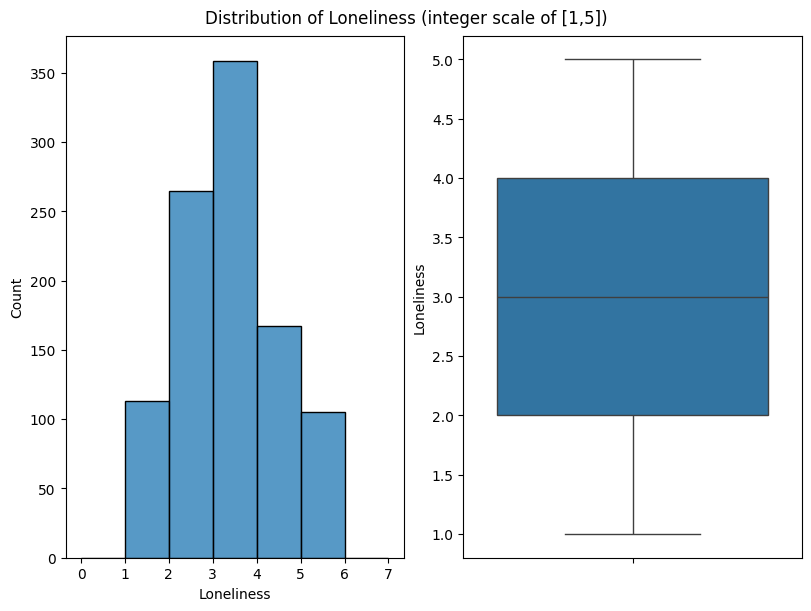

In [267]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(8, 6))

sns.histplot(data=df['Loneliness'], binwidth=1, binrange=[0,7], ax=ax1)

sns.boxplot(data=df['Loneliness'], ax=ax2)
fig.suptitle('Distribution of Loneliness (integer scale of [1,5])')
plt.show()

**Part 2: Exploratory Data Analysis (EDA)**

*1. Univariate Analysis*  
Numeric: histograms or box plots for key variables  
Categorical: bar charts showing frequency distributions for key variables  
? Observations?  
? Special handling for certain variables?  

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1010 non-null   int64  
 1   Music            1007 non-null   float64
 2   Techno           1003 non-null   float64
 3   Movies           1004 non-null   float64
 4   History          1008 non-null   float64
 5   Mathematics      1007 non-null   float64
 6   Pets             1006 non-null   float64
 7   Spiders          1005 non-null   float64
 8   Loneliness       1009 non-null   float64
 9   Parents' advice  1008 non-null   float64
 10  Internet usage   1010 non-null   object 
 11  Finances         1007 non-null   float64
 12  Age              1003 non-null   float64
 13  Siblings         1004 non-null   float64
 14  Gender           1004 non-null   object 
 15  Village - town   1006 non-null   object 
dtypes: float64(12), int64(1), object(3)
memory usage: 126.4+ KB


In [269]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('Unnamed: 0')

len(num_cols)

12

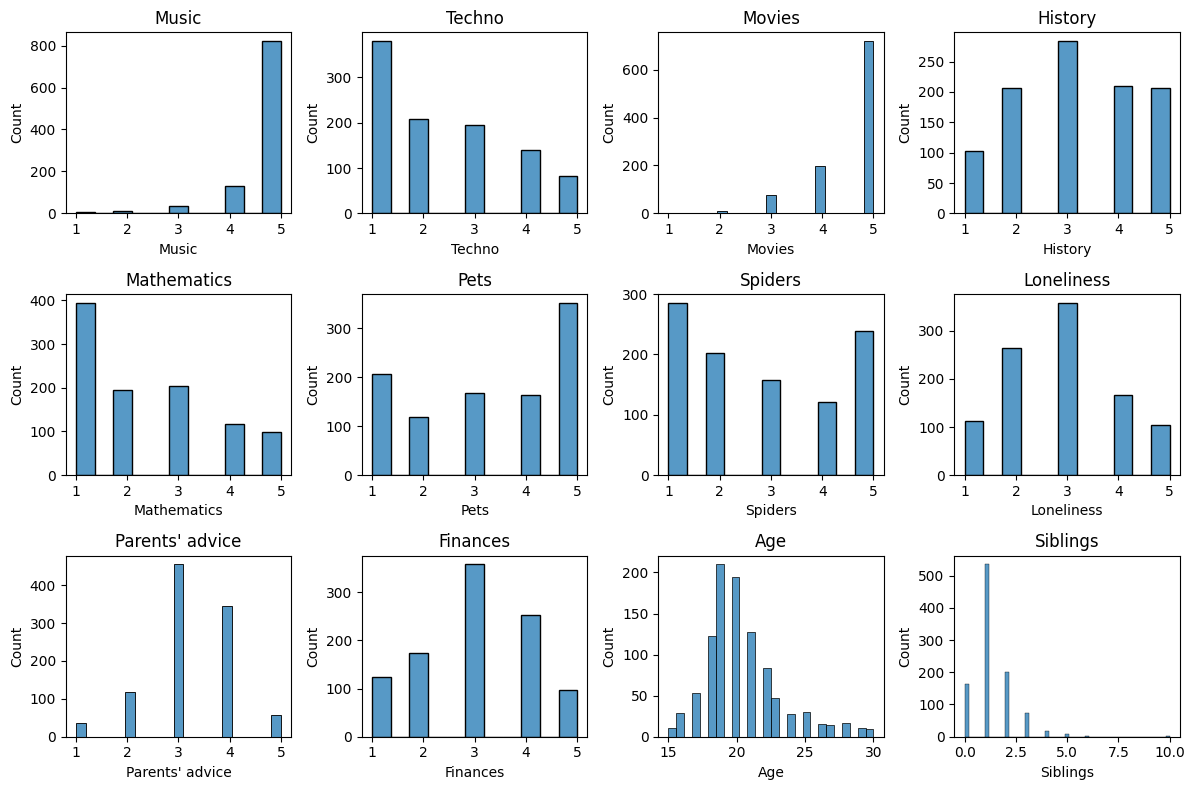

In [270]:
cols = 4
rows = len(num_cols) // cols

fig, ax = plt.subplots(rows, cols, figsize=(12, 8))
axes = ax.flatten()
for col, subplot_ax in zip(num_cols, axes):
    sns.histplot(data=df[col], ax=subplot_ax)
    subplot_ax.set_title(col)

plt.tight_layout()
plt.show()

In [271]:
len(cat_cols)
cat_cols

['Internet usage', 'Gender', 'Village - town']

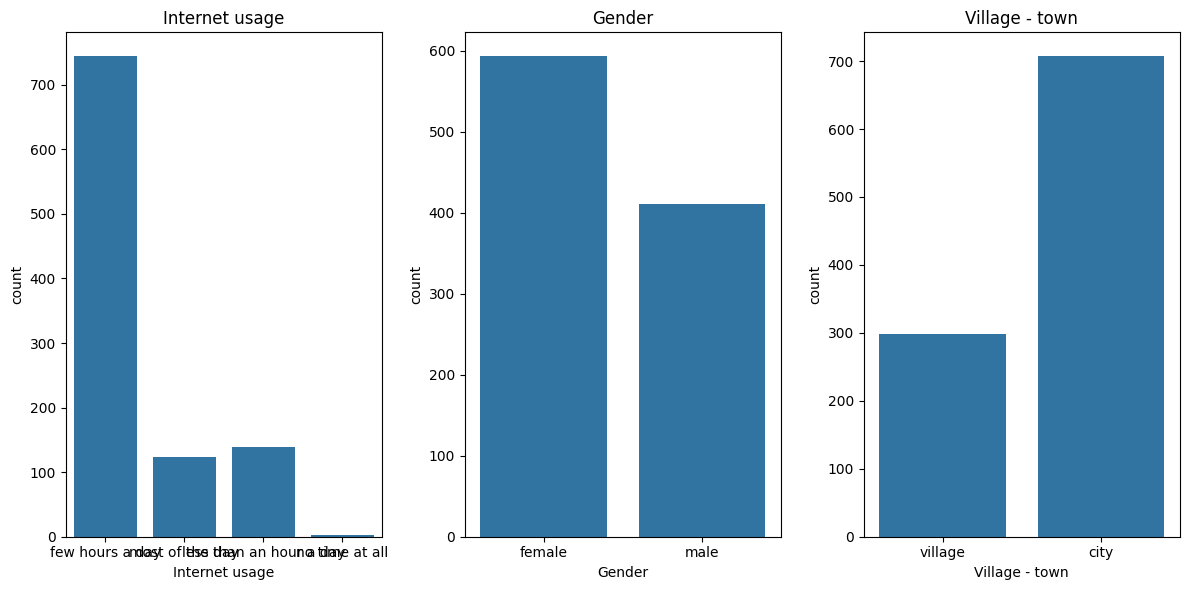

In [272]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

for col, subplot_ax in zip(cat_cols, ax):
    sns.countplot(data=df, x=col, ax=subplot_ax)
    subplot_ax.set_title(col)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


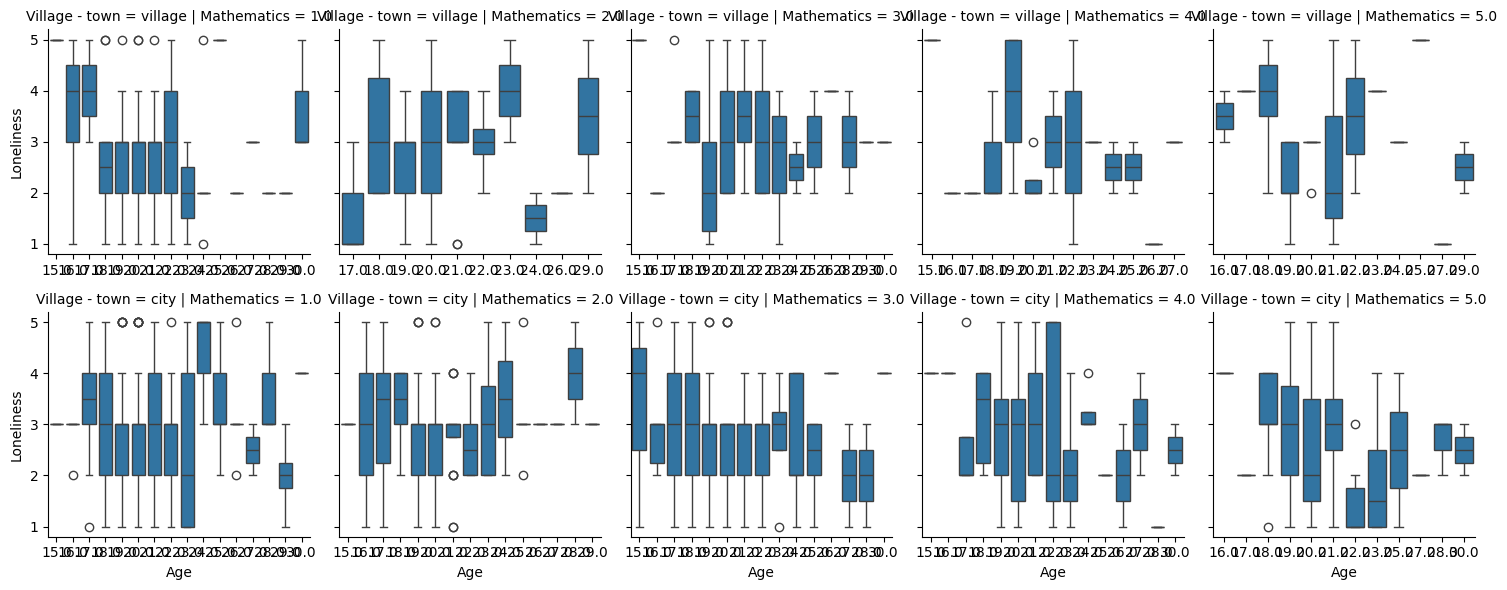

In [273]:
g = sns.FacetGrid(df, row='Village - town', col='Mathematics', sharex=False)
g.map(sns.boxplot, 'Age', 'Loneliness')

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


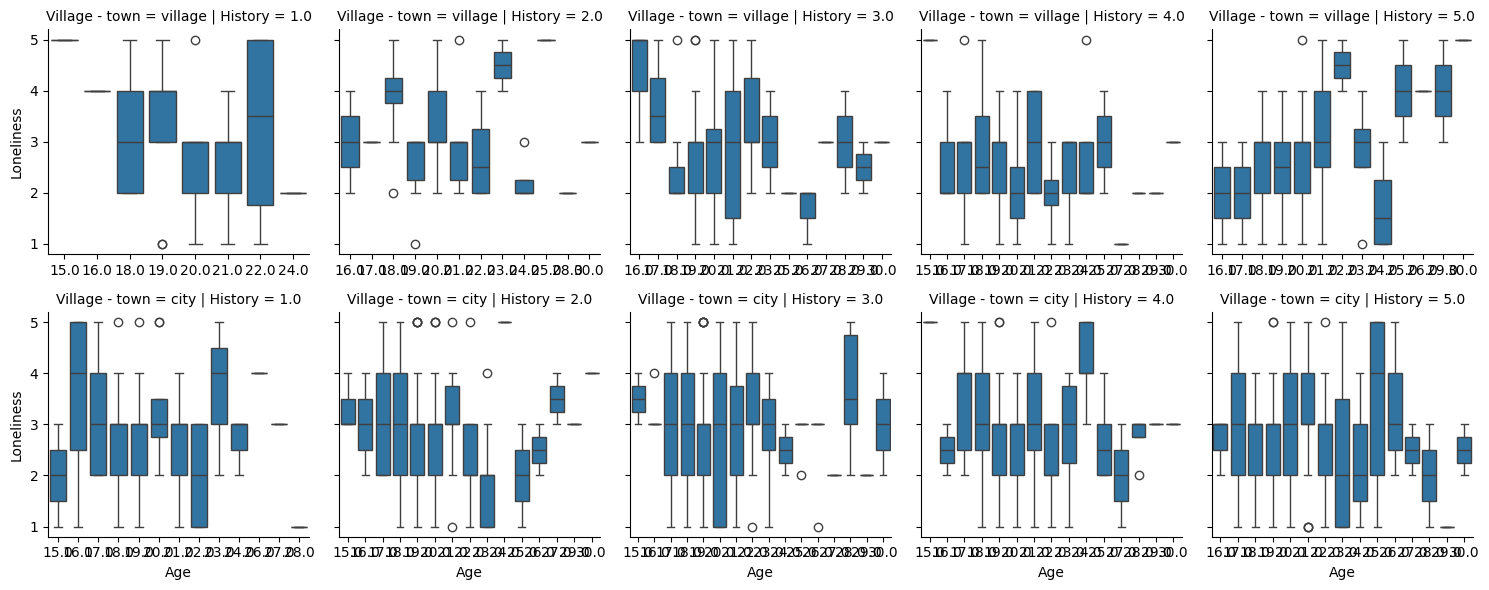

In [274]:
g = sns.FacetGrid(df, row='Village - town', col='History', sharex=False)
g.map(sns.boxplot, 'Age', 'Loneliness')

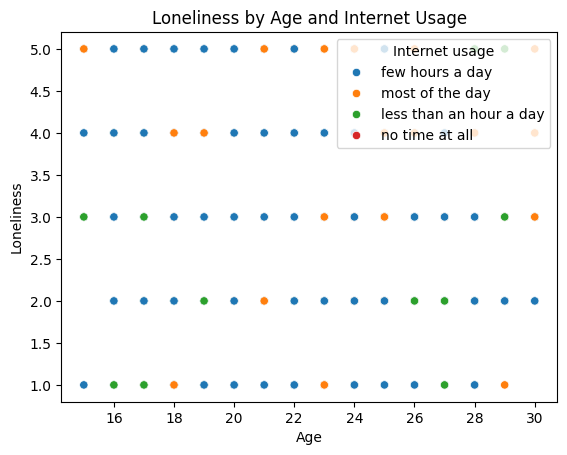

In [275]:
sns.scatterplot(data=df, x='Age', y='Loneliness', hue='Internet usage')
plt.title('Loneliness by Age and Internet Usage')
plt.show()


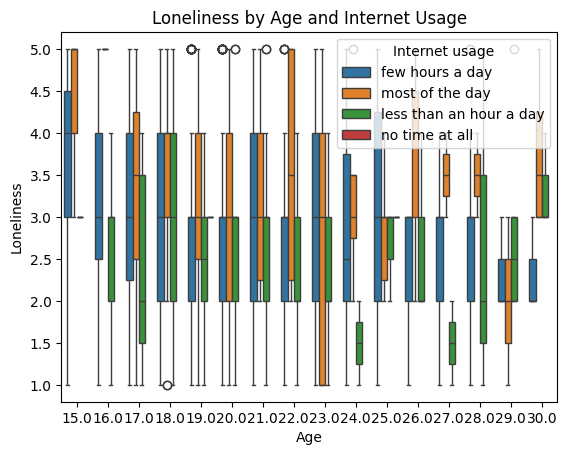

In [276]:
sns.boxplot(data=df, x='Age', y='Loneliness', hue='Internet usage')
plt.title('Loneliness by Age and Internet Usage')
plt.show()

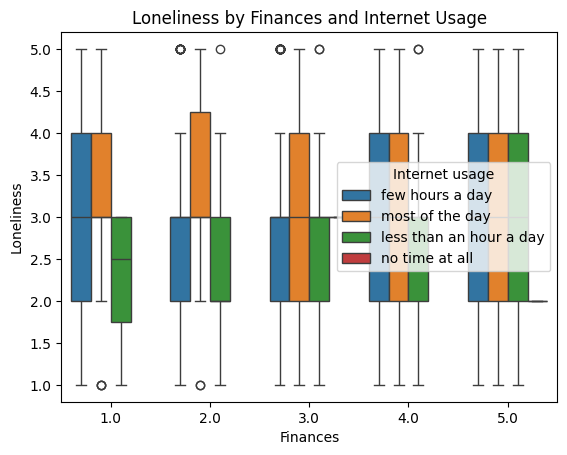

In [277]:
sns.boxplot(data=df, x='Finances', y='Loneliness', hue='Internet usage')
plt.title('Loneliness by Finances and Internet Usage')
plt.show()


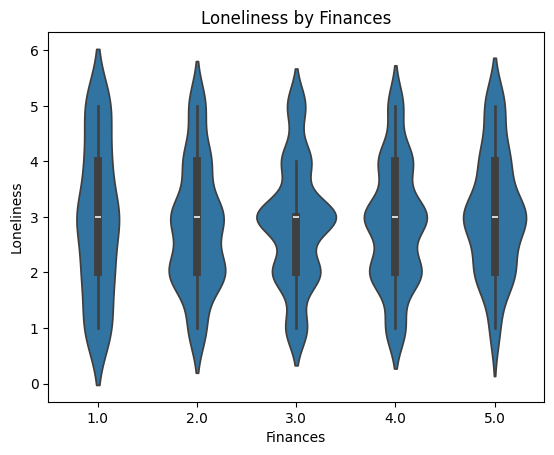

In [278]:
sns.violinplot(data=df, x='Finances', y='Loneliness')
plt.title('Loneliness by Finances')
plt.show()

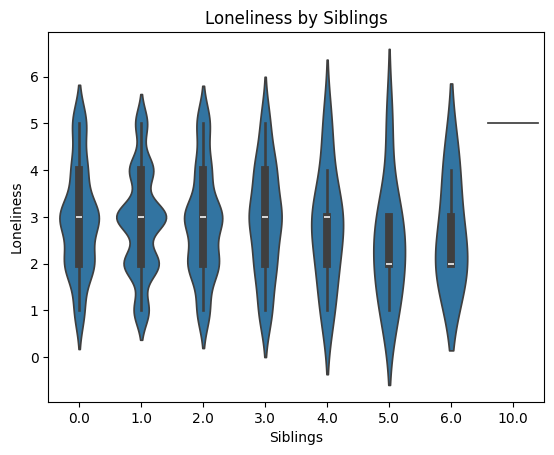

In [279]:
sns.violinplot(data=df, x='Siblings', y='Loneliness')
plt.title('Loneliness by Siblings')
plt.show()


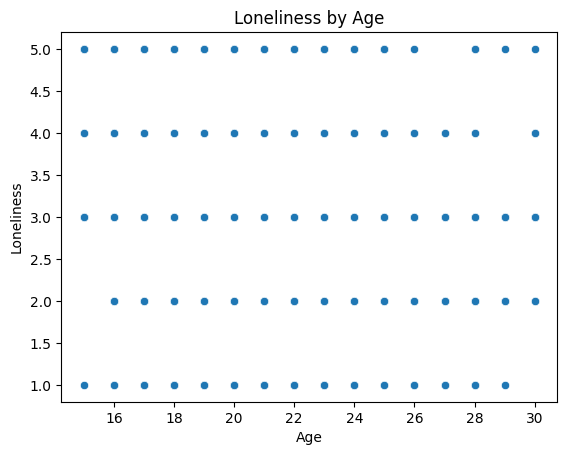

In [280]:
sns.scatterplot(data=df, x='Age', y='Loneliness')
plt.title('Loneliness by Age')
plt.show()


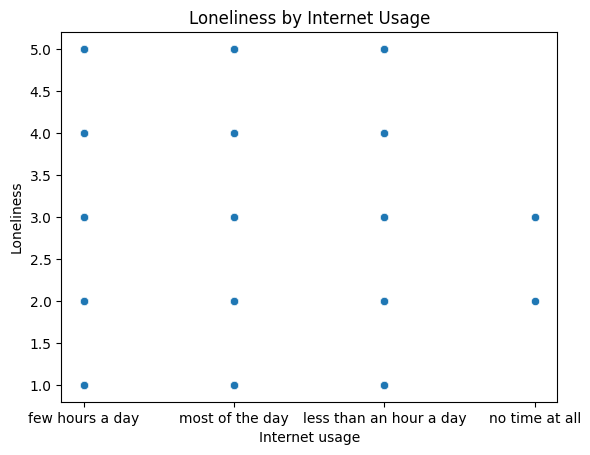

In [281]:
sns.scatterplot(data=df, x='Internet usage', y='Loneliness')
plt.title('Loneliness by Internet Usage')
plt.show()


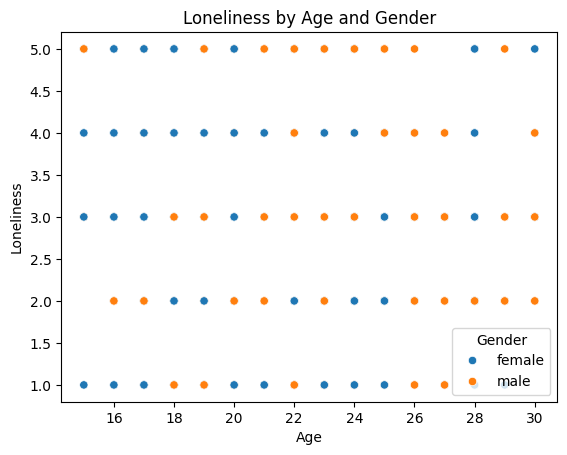

In [282]:
sns.scatterplot(data=df, x='Age', y='Loneliness', hue='Gender')
plt.title('Loneliness by Age and Gender')
plt.show()

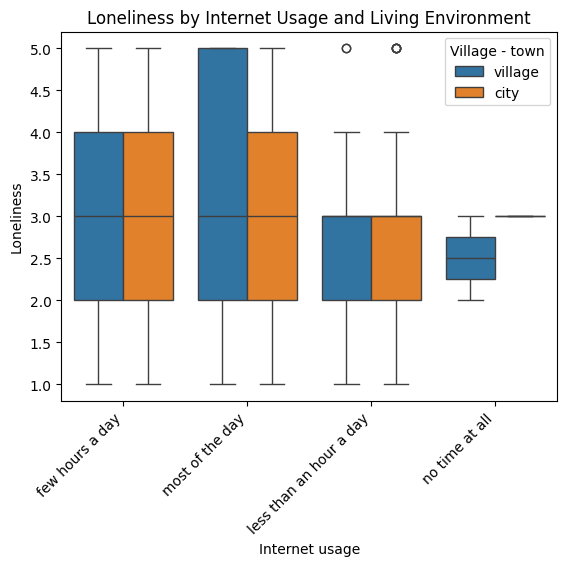

In [283]:
sns.boxplot(data=df, x='Internet usage', y='Loneliness', hue='Village - town')
plt.title('Loneliness by Internet Usage and Living Environment')
# Rotate the labels
plt.xticks(rotation=45, ha='right')
plt.show()

In [284]:
city_nointernet_rows = df[(df['Village - town'] == 'City') & (df['Internet usage'] == 'no time at all')]
city_nointernet_rows

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town


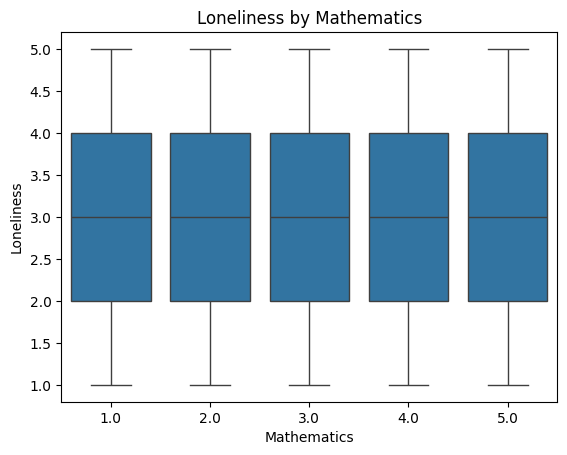

In [285]:
sns.boxplot(data=df, x='Mathematics', y='Loneliness')
plt.title('Loneliness by Mathematics')
plt.show()


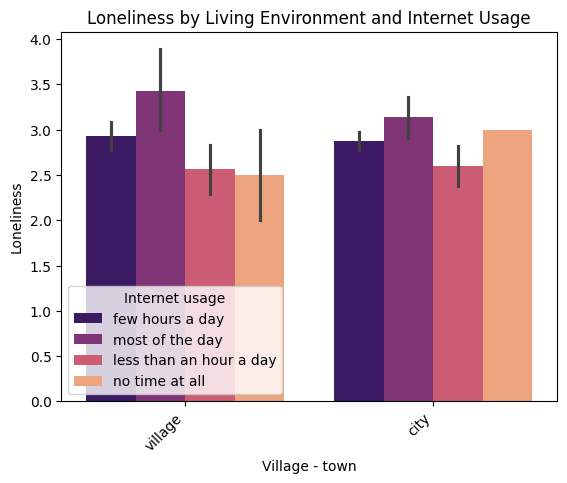

In [286]:
sns.barplot(data=df, x='Village - town', y='Loneliness', hue='Internet usage', palette='magma')
plt.title('Loneliness by Living Environment and Internet Usage')

plt.xticks(rotation=45, ha='right')
plt.show()

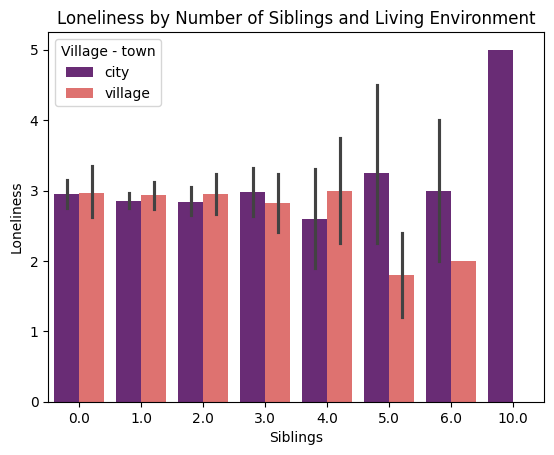

In [287]:
sns.barplot(data=df, x='Siblings', y='Loneliness', hue='Village - town', palette='magma')
plt.title('Loneliness by Number of Siblings and Living Environment')

plt.show()

/tmp/ipython-input-3405310859.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Internet usage', y='Loneliness', palette='magma')


<Axes: xlabel='Internet usage', ylabel='Loneliness'>

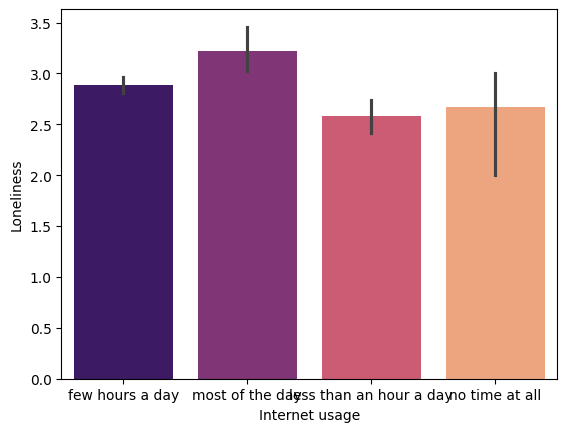

In [288]:
sns.barplot(data=df, x='Internet usage', y='Loneliness', palette='magma')


/tmp/ipython-input-4114025244.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Loneliness', palette='magma')


<Axes: xlabel='Gender', ylabel='Loneliness'>

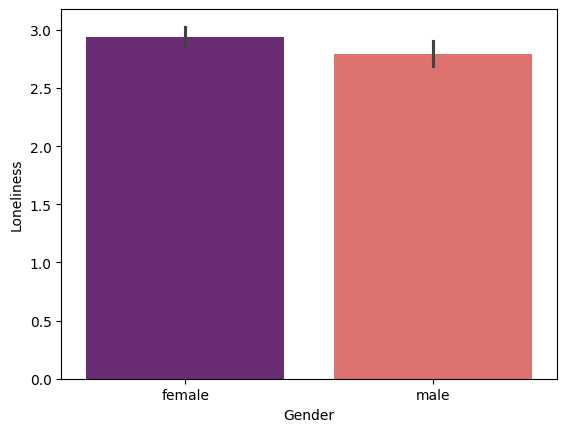

In [289]:
sns.barplot(data=df, x='Gender', y='Loneliness', palette='magma')


/tmp/ipython-input-1676750454.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Village - town', y='Loneliness', palette='magma')


<Axes: xlabel='Village - town', ylabel='Loneliness'>

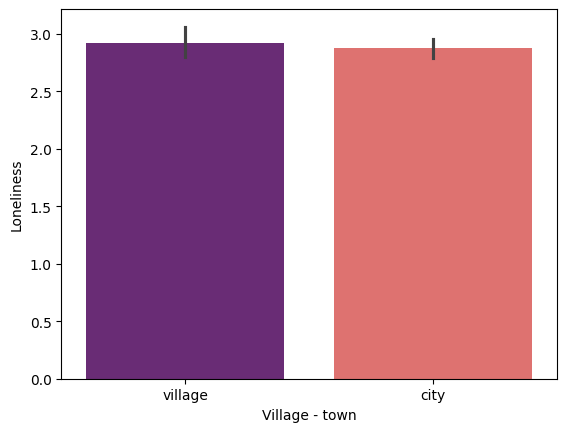

In [290]:
sns.barplot(data=df, x='Village - town', y='Loneliness', palette='magma')


In [291]:
df[df['Siblings'] == 10]

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
12,12,5.0,1.0,5.0,4.0,1.0,2.0,1.0,5.0,4.0,few hours a day,4.0,24.0,10.0,female,city


In [292]:
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

corr_matrix

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Finances,Age,Siblings
Unnamed: 0,1.000000,-0.002399,0.041471,-0.006837,0.015982,0.030611,0.005265,-0.091851,-0.088895,-0.016665,-0.076823,0.055873,-0.021872
Music,-0.002399,1.000000,0.061320,0.208587,0.019379,-0.069702,0.071143,0.071957,0.060561,0.019092,-0.032529,-0.076829,-0.009812
Techno,0.041471,0.061320,1.000000,0.036852,-0.024439,0.062150,0.027111,0.014968,-0.006666,0.021002,-0.039169,-0.017401,0.007249
Movies,-0.006837,0.208587,0.036852,1.000000,0.051159,0.002690,0.131168,0.073421,0.008449,-0.022005,-0.018231,-0.022590,0.007614
History,0.015982,0.019379,-0.024439,0.051159,1.000000,0.011761,0.036422,-0.075780,-0.038652,0.042927,0.008929,0.106643,-0.028279
Mathematics,0.030611,-0.069702,0.062150,0.002690,0.011761,1.000000,-0.031553,-0.116926,-0.029717,0.019501,0.123630,0.036983,0.084928
Pets,0.005265,0.071143,0.027111,0.131168,0.036422,-0.031553,1.000000,0.100542,-0.047376,0.023941,0.018084,-0.025810,-0.061324
Spiders,-0.091851,0.071957,0.014968,0.073421,-0.075780,-0.116926,0.100542,1.000000,0.069041,0.019417,-0.028467,-0.076575,-0.047102
Loneliness,-0.088895,0.060561,-0.006666,0.008449,-0.038652,-0.029717,-0.047376,0.069041,1.000000,-0.017153,0.018268,-0.066186,-0.012323
Parents' advice,-0.016665,0.019092,0.021002,-0.022005,0.042927,0.019501,0.023941,0.019417,-0.017153,1.000000,0.159646,-0.041518,0.034557


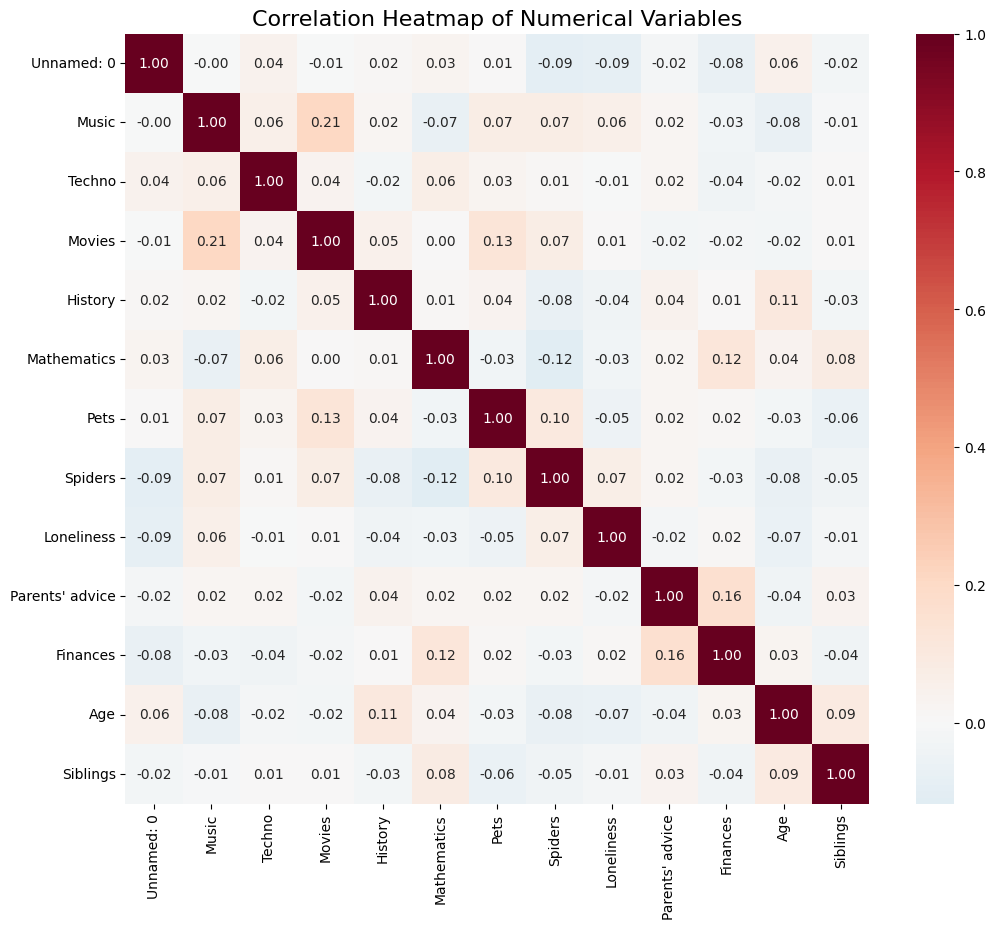

In [293]:
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', center=0)

plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

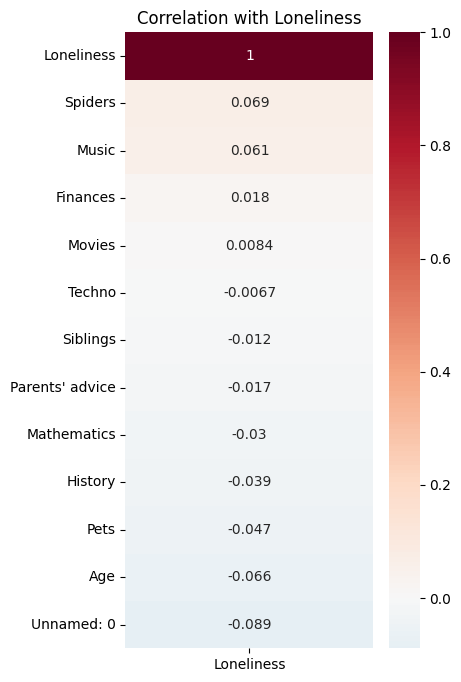

In [294]:
# Sort correlations to see the strongest relationships at the top
loneliness_corr = corr_matrix[['Loneliness']].sort_values(by='Loneliness', ascending=False)

plt.figure(figsize=(4, 8))
sns.heatmap(loneliness_corr, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation with Loneliness')
plt.show()

In [295]:
import numpy as np
sorted = np.sort(abs(loneliness_corr).to_numpy().flatten())
sorted

array([0.00666616, 0.00844879, 0.01232317, 0.01715295, 0.0182679 ,
       0.0297166 , 0.03865243, 0.04737605, 0.06056056, 0.06618633,
       0.06904089, 0.08889521, 1.        ])

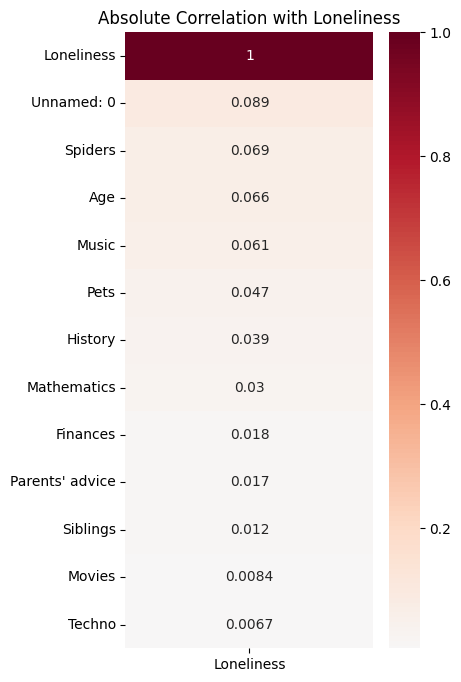

In [296]:
loneliness_corr = abs(corr_matrix[['Loneliness']]).sort_values(by='Loneliness', ascending=False)

plt.figure(figsize=(4, 8))
sns.heatmap(loneliness_corr, annot=True, cmap='RdBu_r', center=0)
plt.title('Absolute Correlation with Loneliness')
plt.show()

In [297]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# We use a formula: Loneliness is predicted by Village_town
# Note: Use the column names exactly as they appear in your dataframe
model = ols('Loneliness ~ Q("Village - town")', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

model = ols('Loneliness ~ Q("Internet usage")', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

model = ols('Loneliness ~ Q("Gender")', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                          sum_sq      df         F    PR(>F)
Q("Village - town")     0.526555     1.0  0.410116  0.522057
Residual             1287.767972  1003.0       NaN       NaN
                          sum_sq      df         F    PR(>F)
Q("Internet usage")    27.249144     3.0  7.222624  0.000085
Residual             1263.870776  1005.0       NaN       NaN
                  sum_sq      df         F    PR(>F)
Q("Gender")     5.452717     1.0  4.292942  0.038527
Residual     1271.428639  1001.0       NaN       NaN


### Part 3

In [298]:
# Select only the object/category columns and drop the rest
df_only_categorical = df.select_dtypes(exclude=['number'])

print("Numerical variables removed. Remaining columns:")
print(df_only_categorical.columns)

Numerical variables removed. Remaining columns:
Index(['Internet usage', 'Gender', 'Village - town'], dtype='object')


In [299]:
# Summary table of missing values per column in %
df.isnull().sum() / len(df) * 100

,0
Unnamed: 0,0.000000
Music,0.297030
Techno,0.693069
Movies,0.594059
History,0.198020
Mathematics,0.297030
Pets,0.396040
Spiders,0.495050
Loneliness,0.099010
Parents' advice,0.198020


/tmp/ipython-input-3880716683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_pct.values, y=missing_pct.index, palette='viridis')


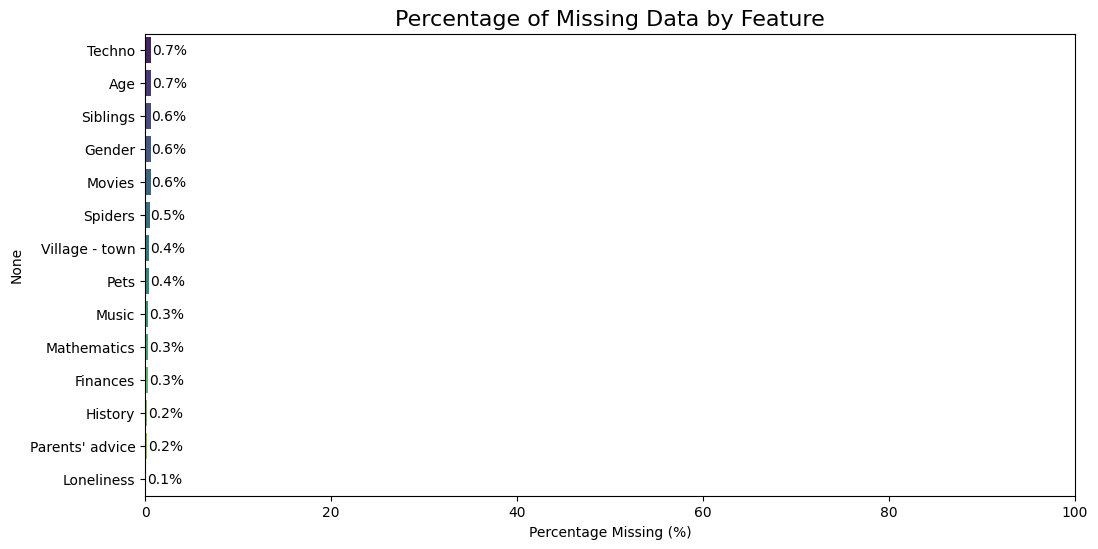

In [300]:
# Calculate percentage
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_pct.values, y=missing_pct.index, palette='viridis')

for i, p in enumerate(missing_pct.values):
    ax.annotate(f'{p:.1f}%', (p + 0.1, i), va='center')

plt.title('Percentage of Missing Data by Feature', fontsize=16)
plt.xlabel('Percentage Missing (%)')
plt.xlim(0, 100)
plt.show()

In [301]:
# 1. Define the specific columns that need the median
median_cols = ['Music', 'Techno', 'Movies', 'Mathematics']

# 2. Identify all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# 3. Loop through and apply the specific logic
for col in numerical_cols:
    if col in median_cols:
        # Apply Median
        df[col] = df[col].fillna(df[col].median())
    else:
        # Apply Mean
        df[col] = df[col].fillna(df[col].mean())
df[numerical_cols]

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Finances,Age,Siblings
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,20.0,1.0
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,3.0,19.0,2.0
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,2.0,20.0,2.0
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,2.0,22.0,1.0
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,4.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1005,5.0,3.0,5.0,4.0,1.0,4.0,2.0,4.0,4.0,3.0,20.0,1.0
1006,1006,4.0,4.0,5.0,4.0,5.0,5.0,1.0,1.0,4.0,3.0,27.0,5.0
1007,1007,4.0,1.0,4.0,2.0,3.0,5.0,2.0,4.0,4.0,1.0,18.0,0.0
1008,1008,5.0,2.0,5.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,25.0,1.0


In [302]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Village - town'] = df['Village - town'].fillna(df['Village - town'].mode()[0])

df['Gender']
df['Village - town']

,Village - town
0,village
1,city
2,city
3,city
4,village
...,...
1005,city
1006,village
1007,city
1008,city


In [303]:
# Encoding Categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

df[categorical_cols]

,Internet usage,Gender,Village - town
0,few hours a day,female,village
1,few hours a day,female,city
2,few hours a day,female,city
3,most of the day,female,city
4,few hours a day,female,village
...,...,...,...
1005,few hours a day,female,city
1006,less than an hour a day,male,village
1007,most of the day,female,city
1008,most of the day,female,city


In [304]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

usage_order = ['no time at all', 'less than an hour a day', 'few hours a day', 'most of the day']

preprocessor = ColumnTransformer(transformers=[
    ('ord', OrdinalEncoder(categories=[usage_order]), ['Internet usage']),
    ('nom', OneHotEncoder(drop='first', sparse_output=False), ['Gender', 'Village - town'])
], remainder='passthrough')

print(f"Feature count BEFORE encoding: {df.shape[1]}")

encoded_data = preprocessor.fit_transform(df)
new_cols = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(encoded_data, columns=new_cols)

print(f"Feature count AFTER encoding: {df_encoded.shape[1]}")
print("-" * 30)
print(f"New Columns Created: {list(new_cols)}")

df_encoded.head()

Feature count BEFORE encoding: 16
Feature count AFTER encoding: 16
------------------------------
New Columns Created: ['ord__Internet usage', 'nom__Gender_male', 'nom__Village - town_village', 'remainder__Unnamed: 0', 'remainder__Music', 'remainder__Techno', 'remainder__Movies', 'remainder__History', 'remainder__Mathematics', 'remainder__Pets', 'remainder__Spiders', 'remainder__Loneliness', "remainder__Parents' advice", 'remainder__Finances', 'remainder__Age', 'remainder__Siblings']


,ord__Internet usage,nom__Gender_male,nom__Village - town_village,remainder__Unnamed: 0,remainder__Music,remainder__Techno,remainder__Movies,remainder__History,remainder__Mathematics,remainder__Pets,remainder__Spiders,remainder__Loneliness,remainder__Parents' advice,remainder__Finances,remainder__Age,remainder__Siblings
0,2.0,0.0,1.0,0.0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,20.0,1.0
1,2.0,0.0,0.0,1.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,3.0,19.0,2.0
2,2.0,0.0,0.0,2.0,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,2.0,20.0,2.0
3,3.0,0.0,0.0,3.0,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,2.0,22.0,1.0
4,2.0,0.0,1.0,4.0,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,4.0,20.0,1.0


In [305]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ord__Internet usage          1010 non-null   float64
 1   nom__Gender_male             1010 non-null   float64
 2   nom__Village - town_village  1010 non-null   float64
 3   remainder__Unnamed: 0        1010 non-null   float64
 4   remainder__Music             1010 non-null   float64
 5   remainder__Techno            1010 non-null   float64
 6   remainder__Movies            1010 non-null   float64
 7   remainder__History           1010 non-null   float64
 8   remainder__Mathematics       1010 non-null   float64
 9   remainder__Pets              1010 non-null   float64
 10  remainder__Spiders           1010 non-null   float64
 11  remainder__Loneliness        1010 non-null   float64
 12  remainder__Parents' advice   1010 non-null   float64
 13  remainder__Finance

In [306]:
df['Internet usage'].unique()

array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

### Part 4

In [307]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['remainder__Loneliness'])
y = df_encoded['remainder__Loneliness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Total dataset rows: {len(df_encoded)}")
print(f"Training set rows: {X_train.shape[0]} ({X_train.shape[0]/len(df_encoded):.0%})")
print(f"Testing set rows:  {X_test.shape[0]} ({X_test.shape[0]/len(df_encoded):.0%})")


Total dataset rows: 1010
Training set rows: 808 (80%)
Testing set rows:  202 (20%)


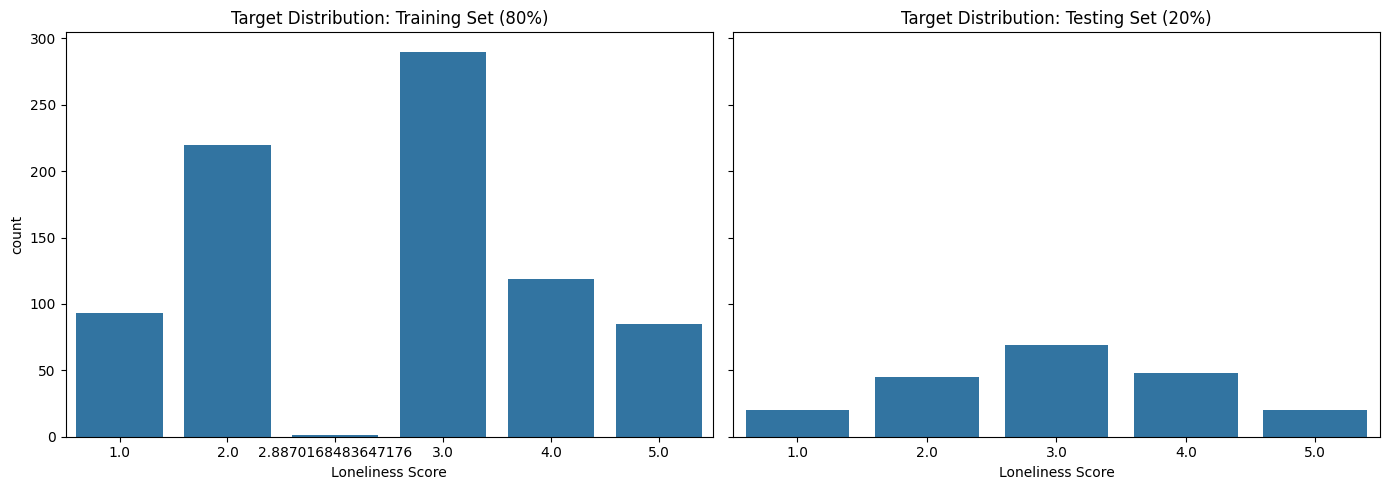

In [308]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Training Set
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Target Distribution: Training Set (80%)')
axes[0].set_xlabel('Loneliness Score')

# Testing Set
sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title('Target Distribution: Testing Set (20%)')
axes[1].set_xlabel('Loneliness Score')

plt.tight_layout()
plt.show()

In [309]:
df['Age'].unique()
df['Siblings'].unique()

array([ 1.        ,  2.        ,  3.        , 10.        ,  0.        ,
        4.        ,  5.        ,  1.29780876,  6.        ])

In [310]:
if 'remainder__Unnamed: 0' in df_encoded.columns:
  df_encoded = df_encoded.drop(columns=['remainder__Unnamed: 0'])
num_cols = df_encoded.select_dtypes(include=['number'])

summary = pd.DataFrame({
    'Min': num_cols.min(),
    'Max': num_cols.max(),
    'Range': num_cols.max() - num_cols.min(),
    'Std Dev': num_cols.std()
}).sort_values(by='Range', ascending=False)

print(summary)

                              Min   Max  Range   Std Dev
remainder__Age               15.0  30.0   15.0  2.819010
remainder__Siblings           0.0  10.0   10.0  1.010331
remainder__Movies             1.0   5.0    4.0  0.693268
remainder__History            1.0   5.0    4.0  1.262270
remainder__Mathematics        1.0   5.0    4.0  1.350607
remainder__Techno             1.0   5.0    4.0  1.319798
remainder__Music              1.0   5.0    4.0  0.663222
remainder__Loneliness         1.0   5.0    4.0  1.131196
remainder__Spiders            1.0   5.0    4.0  1.539866
remainder__Finances           1.0   5.0    4.0  1.142662
remainder__Pets               1.0   5.0    4.0  1.542303
remainder__Parents' advice    1.0   5.0    4.0  0.864878
ord__Internet usage           0.0   3.0    3.0  0.521646
nom__Gender_male              0.0   1.0    1.0  0.491505
nom__Village - town_village   0.0   1.0    1.0  0.456735


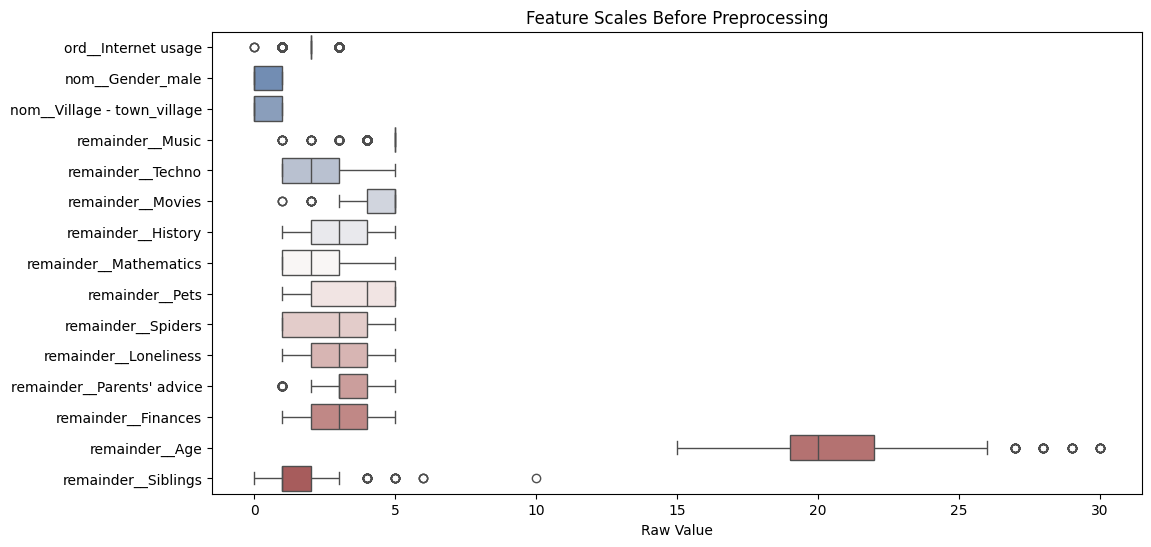

In [311]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_cols, orient='h', palette='vlag')
plt.title('Feature Scales Before Preprocessing')
plt.xlabel('Raw Value')
plt.show()

In [312]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
age_col = 'remainder__Age'

df_encoded[age_col] = scaler.fit_transform(df_encoded[[age_col]])

print(f"New Range for {age_col}:")
print(f"Min: {df_encoded[age_col].min():.2f}")
print(f"Max: {df_encoded[age_col].max():.2f}")
print(f"Mean: {df_encoded[age_col].mean():.2f} (Should be 0)")
print(f"Std Dev: {df_encoded[age_col].std():.2f} (Should be 1)")

New Range for remainder__Age:
Min: -1.93
Max: 3.40
Mean: 0.00 (Should be 0)
Std Dev: 1.00 (Should be 1)


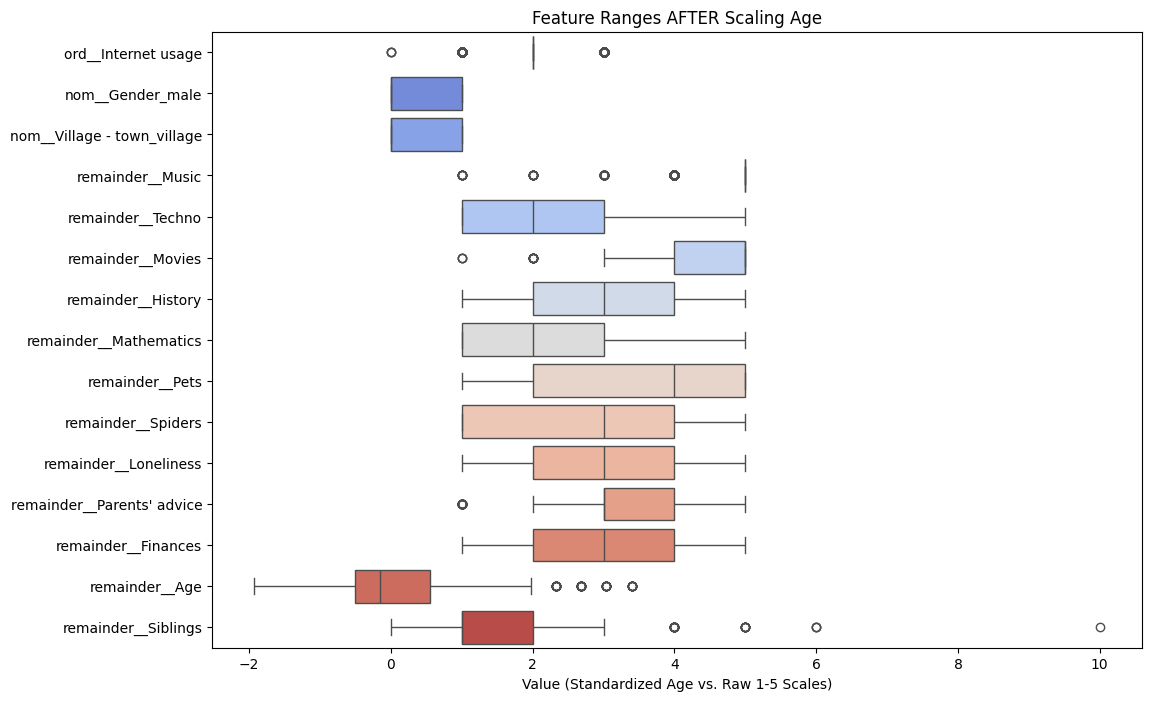

In [313]:
age_col = 'remainder__Age' if 'remainder__Age' in df_encoded.columns else 'Age'
df_encoded[age_col] = scaler.fit_transform(df_encoded[[age_col]])

num_cols_updated = df_encoded.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=num_cols_updated, orient='h', palette='coolwarm')
plt.title('Feature Ranges AFTER Scaling Age')
plt.xlabel('Value (Standardized Age vs. Raw 1-5 Scales)')
plt.show()